In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [5]:
from ISLP import load_data
Default = load_data('Default')
Default.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

In [6]:
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [7]:
# Füge Dummy Variablen hinzu für die Zielvariable 'default'
Default = pd.get_dummies(Default, columns=['default'])
Default.head()

,student,balance,income,default_No,default_Yes
0,No,729.526495,44361.625074,True,False
1,Yes,817.180407,12106.134700,True,False
2,No,1073.549164,31767.138947,True,False
3,No,529.250605,35704.493935,True,False
4,No,785.655883,38463.495879,True,False


Intercept: [-10.91699983]
Coefficient for balance: [0.00564782]


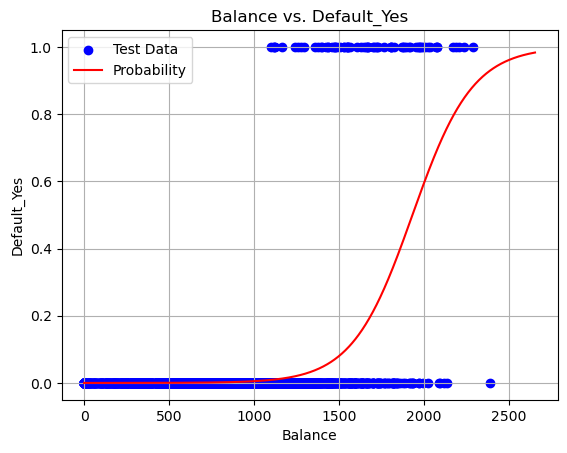

In [8]:

X = Default[['balance']]
y = Default['default_Yes'].map({False: 0, True: 1}) 

# Split data into training and testing sets (using only training set for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training der Modelle
logistic_model = LogisticRegression(penalty=None, random_state=0).fit(X_train, y_train, sample_weight=None)

y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

print(f"Intercept: {logistic_model.intercept_}")
print(f"Coefficient for balance: {logistic_model.coef_[0]}")

# Scatterplot erstellen
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# Get the regression line: predict across the range of X values
X_range = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
X_range = pd.DataFrame(X_range, columns=X_train.columns)
y_range_pred_proba = logistic_model.predict_proba(X_range)[:, 1]
y_range_pred = logistic_model.predict(X_range)

# Plot the regression line
plt.plot(X_range, y_range_pred_proba, color='red', label=f'Probability')

# Labels and title
plt.xlabel('Balance')
plt.ylabel('Default_Yes')
plt.title(f'Balance vs. Default_Yes')

# Show the legend and plot
plt.legend()
plt.grid()
plt.show()

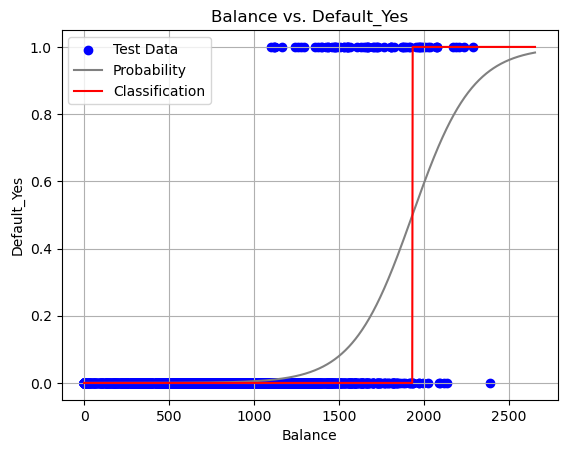

In [9]:
# Scatterplot erstellen
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# Get the regression line: predict across the range of X values
X_range = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
X_range = pd.DataFrame(X_range, columns=X_train.columns)

# Wahrscheinlichkeit 
y_range_pred_proba = logistic_model.predict_proba(X_range)[:, 1]

# Klasifikation p<=/>0.5
y_range_pred = logistic_model.predict(X_range)


# Plot the regression line
plt.plot(X_range, y_range_pred_proba, color='grey', label=f'Probability')
plt.plot(X_range, y_range_pred, color='red', label=f'Classification')

# Add labels and title
plt.xlabel('Balance')
plt.ylabel('Default_Yes')
plt.title(f'Balance vs. Default_Yes')

# Show the legend and plot
plt.legend()
plt.grid()
plt.show()

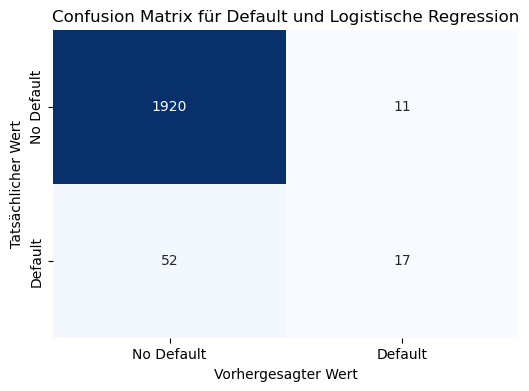

In [10]:
# Berechne die Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Zeichne die Confusion Matrix als Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix für Default und Logistische Regression')
plt.xlabel('Vorhergesagter Wert')
plt.ylabel('Tatsächlicher Wert')
plt.show()

In [11]:
# Angepasster Cutoff-Point (z.B. 0.4)
cutoff_point = 0.1

# Wahrscheinlichkeiten vorhersagen
y_prob = logistic_model.predict_proba(X_test)[:, 1]

# Angepasste Vorhersagen basierend auf dem neuen Cutoff-Point
y_pred_custom_cutoff = (y_prob >= cutoff_point).astype(int)

# Berechne die Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_custom_cutoff)

# Definiere eine Liste von verschiedenen Cutoff-Punkten
cutoff_points = [0.1, 0.3, 0.5, 0.7, 0.9]

# Schleife durch verschiedene Cutoff-Points und berechne die Confusion Matrix
for cutoff in cutoff_points:
    # Vorhersagen basierend auf dem aktuellen Cutoff
    y_pred_custom_cutoff = (y_prob >= cutoff).astype(int)
    
    # Berechne die Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred_custom_cutoff)

    # f1-score
    f1 = f1_score(y_test, y_pred_custom_cutoff)
    
    # Gib die Confusion Matrix als Text aus
    print(f"\nConfusion Matrix für Cutoff-Point = {cutoff}:\n")
    print(f"True Negatives (TN): {conf_matrix[0, 0]}")
    print(f"False Positives (FP): {conf_matrix[0, 1]}")
    print(f"False Negatives (FN): {conf_matrix[1, 0]}")
    print(f"True Positives (TP): {conf_matrix[1, 1]}")
     # F1-Score anzeigen
    print(f"F1-Score: {f1:.2f}")



Confusion Matrix für Cutoff-Point = 0.1:

True Negatives (TN): 1818
False Positives (FP): 113
False Negatives (FN): 24
True Positives (TP): 45
F1-Score: 0.40

Confusion Matrix für Cutoff-Point = 0.3:

True Negatives (TN): 1898
False Positives (FP): 33
False Negatives (FN): 42
True Positives (TP): 27
F1-Score: 0.42

Confusion Matrix für Cutoff-Point = 0.5:

True Negatives (TN): 1920
False Positives (FP): 11
False Negatives (FN): 52
True Positives (TP): 17
F1-Score: 0.35

Confusion Matrix für Cutoff-Point = 0.7:

True Negatives (TN): 1926
False Positives (FP): 5
False Negatives (FN): 64
True Positives (TP): 5
F1-Score: 0.13

Confusion Matrix für Cutoff-Point = 0.9:

True Negatives (TN): 1930
False Positives (FP): 1
False Negatives (FN): 69
True Positives (TP): 0
F1-Score: 0.00


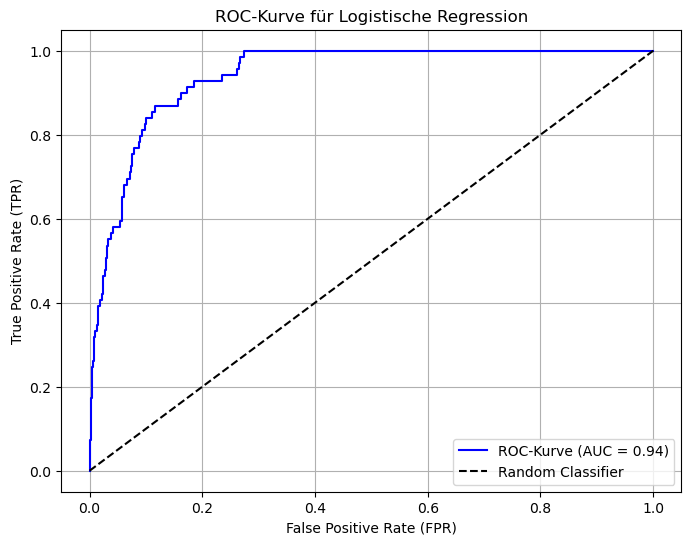

In [12]:

# Berechne die ROC-Kurve (FPR, TPR) für verschiedene Cutoff-Points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Berechne den AUC-Wert (Area Under the Curve)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Zeichne die ROC-Kurve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC-Kurve (AUC = {auc_score:.2f})', color='b')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Diagonale Linie für Zufalls-Klassifikator
plt.title('ROC-Kurve für Logistische Regression')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()